In [83]:
import torch.nn.functional as F
import numpy as np
import torch
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug

In [84]:
aug = MNISTAug()
dm = DataManager()
dm.load_test()

In [85]:
aug.min_objects = 1
aug.max_objects = 1

{'class': 8,
 'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'x1': 58,
 'y1': 62,
 'x2': 75,
 'y2': 79,
 'cx': 66.5,
 'cy': 70.5,
 'height': 17,
 'width': 17}

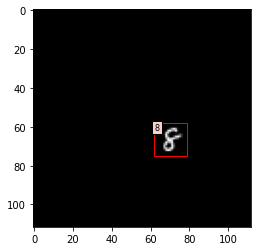

In [86]:
image, label = aug.get_augmented(dm.x_test, dm.y_test, 1)
image = image[0]
label = label[0][0]
DataManager.plot_num(image.reshape((112, 112)), [label])
label

In [87]:
op_w = 64
op_h = 64

in_w = 112
in_h = 112

In [88]:
def add_scalar_noise(value, scale=0.01):
    return value + (np.random.random((1,))[0] - 0.5) * scale

cx = add_scalar_noise(label['cx'] / in_w)
cy = add_scalar_noise(label['cy'] / in_h)
w = add_scalar_noise(label['width'] / in_w)
h = add_scalar_noise(label['height'] / in_h)
theta = [cx, cy, w, h]

In [89]:
region_w = int(w * in_w)
region_h = int(h * in_h)
region_x1 = int((cx * in_w) - (region_w / 2))
region_y1 = int((cy * in_h) - (region_h / 2))

In [90]:
image = torch.tensor(image).view((1, 1, in_w, in_h))
crop = image[:, :, region_x1: region_x1 + region_w, region_y1: region_y1 + region_h]
crop.shape

torch.Size([1, 1, 17, 16])

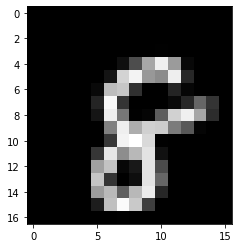

In [91]:
crop_w = crop.shape[2]
crop_h = crop.shape[3]

DataManager.plot_num(crop.view(crop_w, crop_h))

In [92]:
x = F.interpolate(crop, (op_w, op_h), mode='bilinear')
x.shape, (op_w, op_h)

(torch.Size([1, 1, 64, 64]), (64, 64))

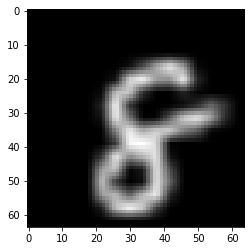

In [93]:
DataManager.plot_num(x[0][0])
